In [2]:
!pip install imblearn

In [3]:
import numpy as np
import pandas as pd

#Data visualizaton 
import seaborn as sns

import matplotlib.pyplot as plt

# machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder,MinMaxScaler 
#from sklearn.impute import SimpLeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from imblearn.over_sampling import RandomOverSampler
import pickle
sns.set()




In [4]:
df = pd.read_csv("indian_liver.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.rename(columns={"Dataset":"Result"},inplace =True)# how to change column"Datatset "to another name 

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Result                          int64
dtype: object

EDE

In [8]:
liver_t = df['Result'].value_counts().to_frame()
liver_t

,Result
1,416
2,167


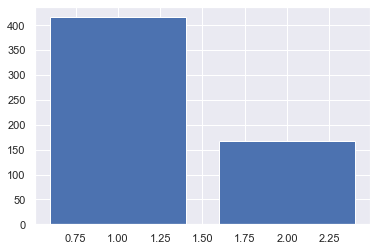

In [9]:
plt.bar(liver_t.index,liver_t['Result'])
plt.show()

In [10]:
G_table= df['Gender'].value_counts().to_frame()

In [11]:
G_table

,Gender
Male,441
Female,142


In [12]:
x= G_table.index
y = G_table['Gender']


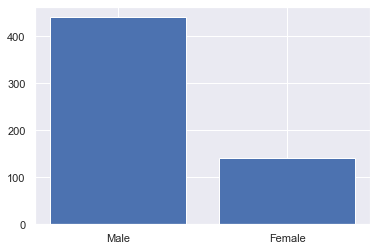

In [13]:
plt.bar(x,y)
plt.show()

In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Machine learning 

In [58]:
# split date into train and test 
train  = df.sample(frac=0.8, random_state=25)
test =df.drop(train.index)

In [16]:
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
446,54,Male,0.8,0.2,181,35,20,5.5,2.7,0.96,1
120,32,Male,23.0,11.3,300,482,275,7.1,3.5,0.90,1
403,65,Male,0.7,0.2,199,19,22,6.3,3.6,1.30,2
276,35,Male,0.9,0.2,190,25,20,6.4,3.6,1.20,2
483,30,Male,0.8,0.2,182,46,57,7.8,4.3,1.20,2


In [17]:
df.shape

(583, 11)

In [18]:
print(train.shape[0])
print(test.shape[0])

466
117


Norminal and ordinal encoding 
when their is normal eg female , male : we use label encoding or one_hot_endoding 

when it is ordered  eg rank in office ; we use label or ordinal encoding

In [19]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
train['Gender']=train['Gender'].map({'Male':0,'Female':1})


In [21]:
train["Gender"].unique()

array([0, 1], dtype=int64)

In [22]:
train.reset_index(drop=True, inplace=True)

In [23]:
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,54,0,0.8,0.2,181,35,20,5.5,2.7,0.96,1
1,32,0,23.0,11.3,300,482,275,7.1,3.5,0.90,1
2,65,0,0.7,0.2,199,19,22,6.3,3.6,1.30,2
3,35,0,0.9,0.2,190,25,20,6.4,3.6,1.20,2
4,30,0,0.8,0.2,182,46,57,7.8,4.3,1.20,2


In [24]:
# check for mulitcolineraity 

In [25]:
R = train.corr()

<AxesSubplot:>

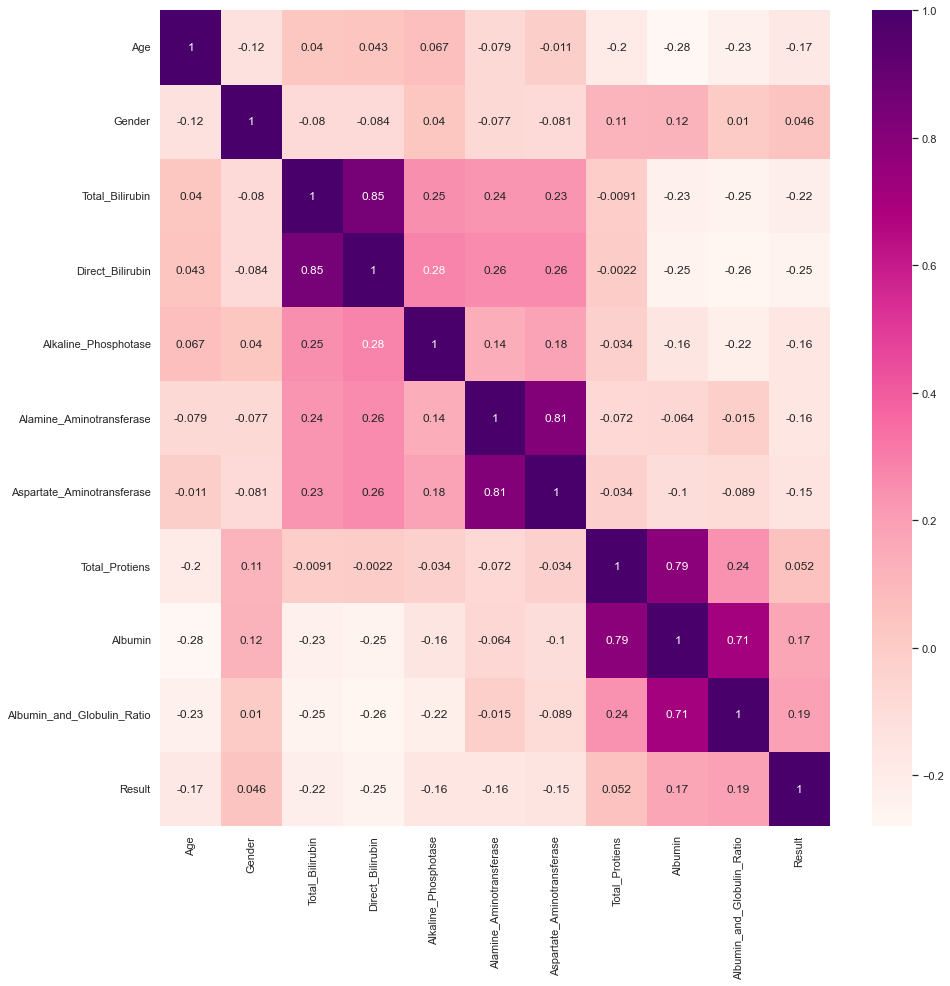

In [26]:
plt.figure(figsize =(15,15))
sns.heatmap(R,annot=True,cmap = "RdPu")

<AxesSubplot:>

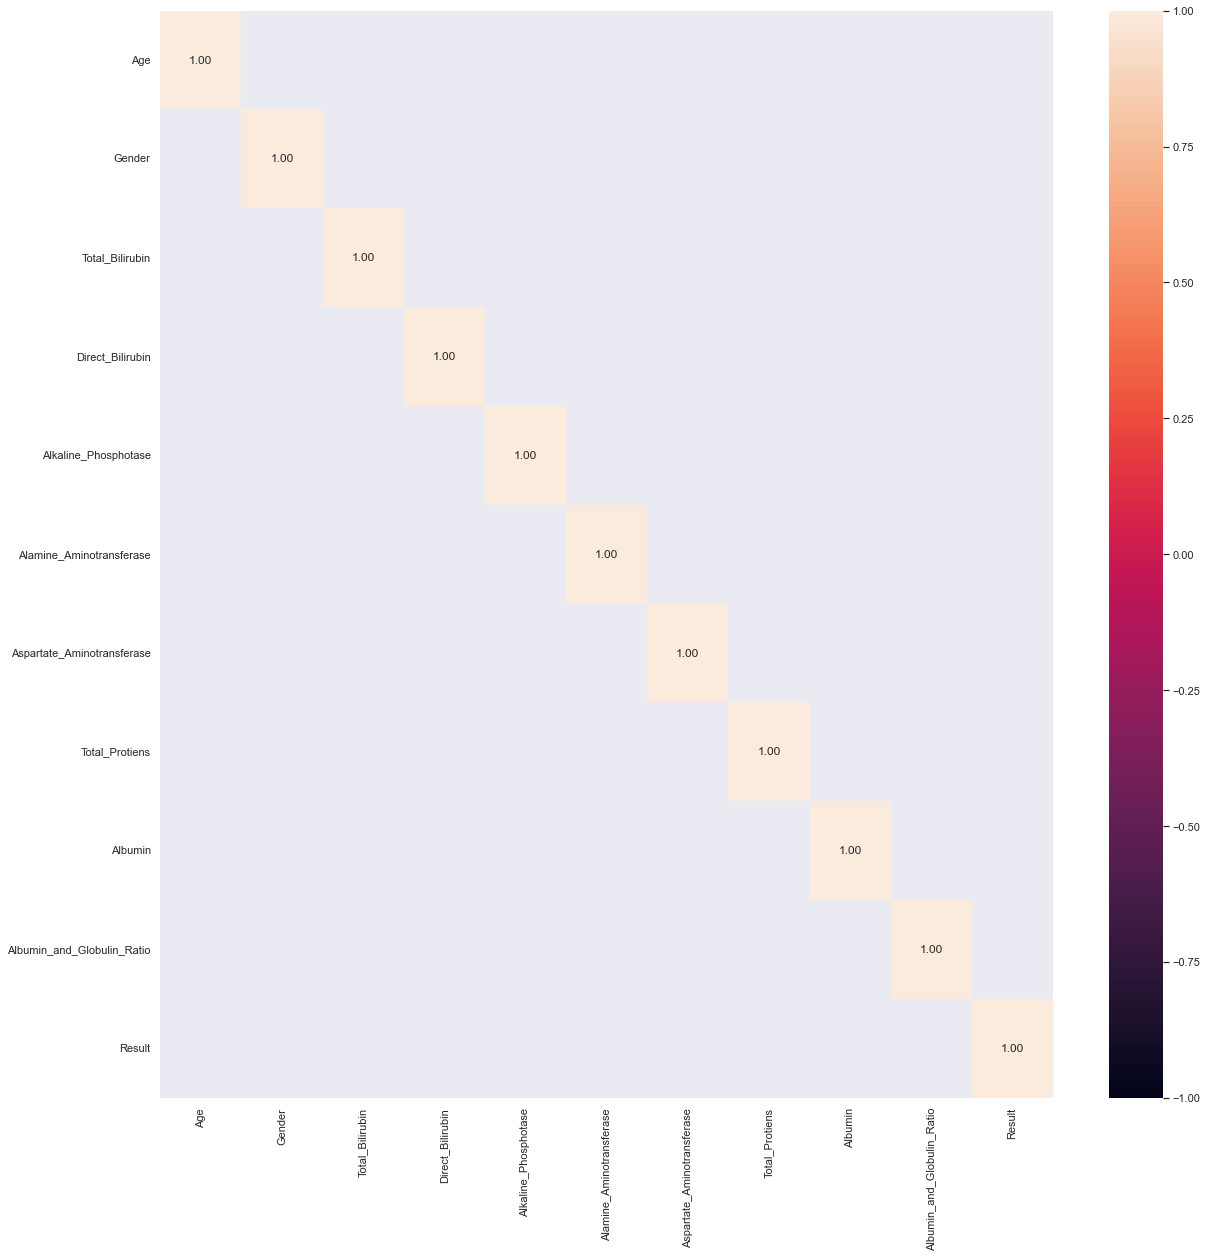

In [27]:
mask = R[(R >= 0.85)|(R <= -0.85)]
plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt= '0.2f')

In [28]:
c = df.corr()['Result'].sort_values(ascending = False)
c

Result                        1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Result, dtype: float64

In [29]:
train.drop(['Total_Bilirubin','Aspartate_Aminotransferase'], axis=1, inplace=True)

In [30]:
#how to check for missing values
train.isnull().sum()

Age                           0
Gender                        0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Result                        0
dtype: int64

In [31]:
#how to drop missing values  
train.dropna(axis=0,inplace=True)

In [32]:
# #spilt training date to feature varible and target variable

x_train = train.drop("Result",axis=1)
y_train = train['Result']

In [33]:
train.head(2)

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
0,54,0,0.2,181,35,5.5,2.7,0.96,1
1,32,0,11.3,300,482,7.1,3.5,0.90,1


In [34]:
cols = x_train.columns
cols

Index(['Age', 'Gender', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [35]:
# 
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [59]:
test.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
Result                        0
dtype: int64

feature importanc 


In [60]:
test.dropna(axis=0,inplace=True)

In [38]:
decision_tree = DecisionTreeClassifier(max_depth =10)
decision_tree.fit(x_train,y_train)
predictors =cols
coef = pd.DataFrame(decision_tree.feature_importances_,predictors,columns=['importance']).sort_values(ascending=False,by = 'importance')
coef

,importance
Direct_Bilirubin,0.203064
Age,0.176187
Alkaline_Phosphotase,0.175280
Alamine_Aminotransferase,0.139570
Total_Protiens,0.120170
Albumin_and_Globulin_Ratio,0.089771
Albumin,0.079407
Gender,0.016551


In [39]:
def model_to_use(ml_algo):
    if ml_algo == "DT":
        model = DecisionTreeClassifier()
    elif ml_algo == 'RF':
        model = RandomForestClassifier()
    elif ml_algo == 'XGBC':
        model == XGBClassifier()
    elif ml_algo == 'LR':
        model == LogisticRegression()

    return model


In [42]:
model = model_to_use('DT')
model

DecisionTreeClassifier()

In [46]:
df['Result'].value_counts()

1    416
2    167
Name: Result, dtype: int64

In [50]:
test.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Result                        0
dtype: int64

In [61]:
test['Gender'] = test['Gender'].map({'Male':0,'Female':1})
test['Gender'].unique()

array([0, 1], dtype=int64)

In [62]:
test.drop(['Total_Bilirubin','Aspartate_Aminotransferase'], axis=1, inplace=True)

In [63]:
x_test = test.drop('Result', axis=1)
y_test = test['Result']

In [64]:
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test= scaler.transform(x_test)


In [69]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# predict probability for test dateset 

y_pred_prob = model.predict_proba(x_test)
y_pred_prob = [x[1] for x in y_pred_prob]


In [77]:
def compute_evaluation_metric (model,x_test, y_actual, y_predicted, y_predicted_prob):
    print("\n Accuracy Score: \n", accuracy_score(y_actual,y_pred))
    print("\n UC Sore:\n",roc_auc_score(y_actual,y_predicted_prob))
    print("\n Confusion Matrix : \n", confusion_matrix(y_actual, y_predicted))
    print ("\n Classification Report :\n", classification_report(y_actual,y_predicted))

    print ("\n ROC Curve:\n")
    sns.set_style("white")
    plot_roc_curve(model,x_test,y_actual)
    plt.show()


In [78]:
from imblearn.over_sampling import SMOTE



 Accuracy Score: 
 0.6379310344827587

 UC Sore:
 0.5717360114777619

 Confusion Matrix : 
 [[60 22]
 [20 14]]

 Classification Report :
               precision    recall  f1-score   support

           1       0.75      0.73      0.74        82
           2       0.39      0.41      0.40        34

    accuracy                           0.64       116
   macro avg       0.57      0.57      0.57       116
weighted avg       0.64      0.64      0.64       116


 ROC Curve:



c:\Users\bencool\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


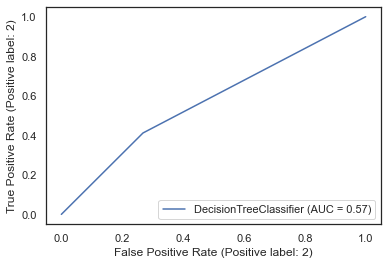

In [79]:
compute_evaluation_metric(model,x_test,y_test, y_pred, y_pred_prob)